### Some of the reasons why employees leave:

Some of the many reasons of why employees leave/quit maybe due to: 
 
 -> Lack of environment or job satisfaction
 
 -> Feeling undervalued
 
 -> No flexible work timings
 
 -> Lack of advancement/promotion opportunities
 
 -> Inability to cope with work overload and the resulting stress


## Import Libraries and Acquire Data

In [1]:
#Exploratory Data Analysis and Wrangling
import pandas as pd
import numpy as np
import random as rnd

In [2]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import class_weight

In [4]:
#Read the csv file
df = pd.read_csv("C:/Users/Shreya Sajid/Documents/Git/Employee-Attrition-Data.csv")

# 1. DATA EXPLORATION

In [5]:
#Dimensions of Data set
df.shape

(1470, 35)

##### Inference - 1470 rows and 35 features.

In [6]:
#Overview of the data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
#Description of the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
#Check for missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Inference - No missing values.

In [9]:
#To check the datatypes of the features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
#ATTRITION - Frequency
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

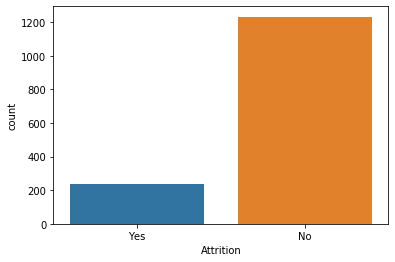

In [11]:
sns.countplot(x = 'Attrition',data = df)

##### Inference - It is quite an imbalanced dataset.

# 2. DATA VISUALIZATION

## 2.1 Univariate Analysis

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

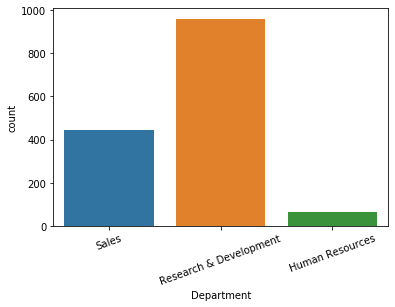

In [12]:
from matplotlib.pyplot import xticks
sns.countplot("Department",data = df)
xticks(rotation = 20)

##### The most common department in the data set is Research & Development

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

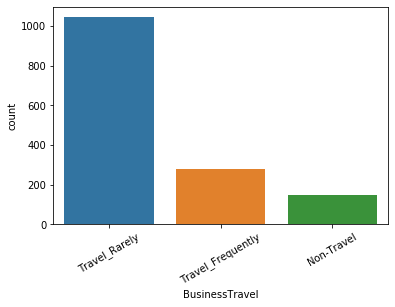

In [13]:
sns.countplot("BusinessTravel",data = df)
xticks(rotation = 30)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

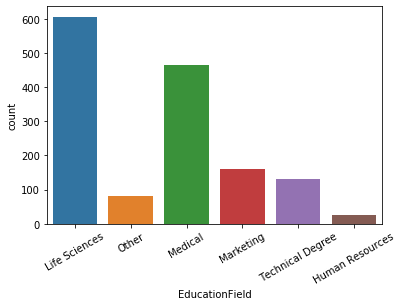

In [14]:
sns.countplot("EducationField",data = df)
xticks(rotation = 30)

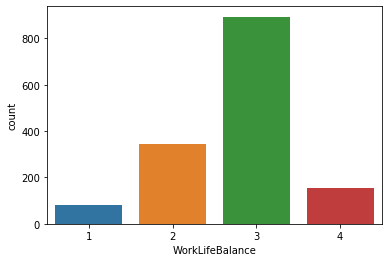

In [15]:
sns.countplot("WorkLifeBalance",data = df)

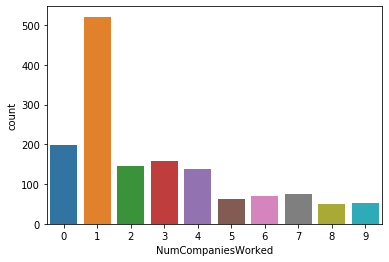

In [16]:
sns.countplot("NumCompaniesWorked",data = df)

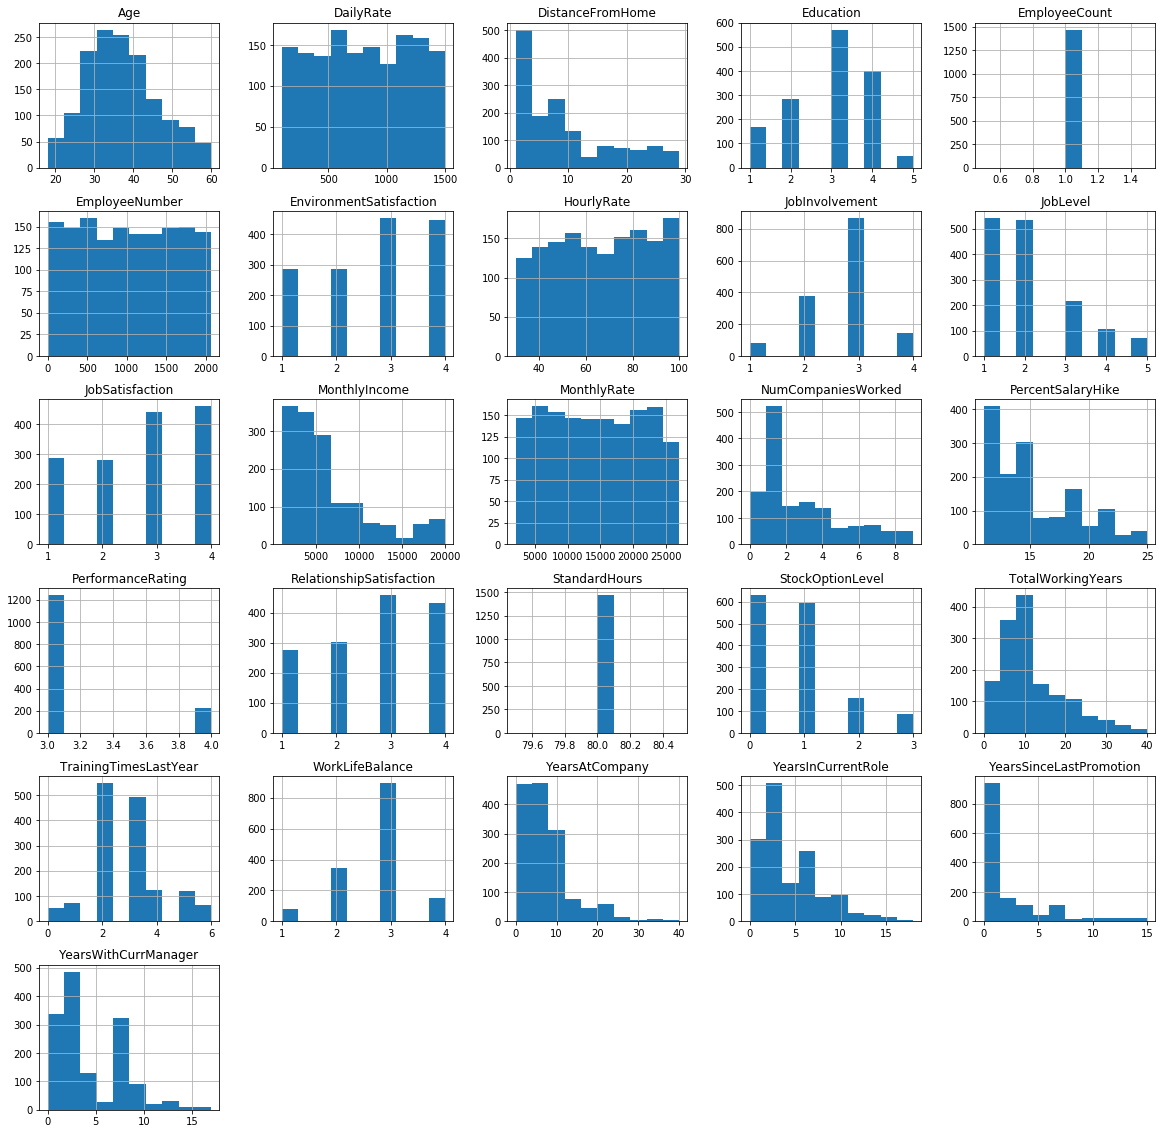

In [17]:
#To obtain the distribution
df.hist(linewidth=1.2, figsize=(20, 20));

## 2.2 Bivariate Analysis

Text(0.5, 1.0, 'Attition vs Monthly Income')

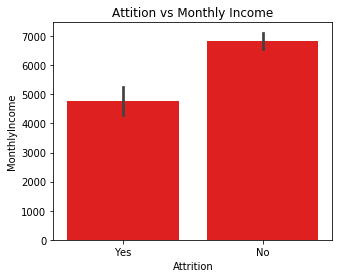

In [18]:
#Barplot - Attrition vs MonthlyIncome
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='Attrition',y='MonthlyIncome',color='red')
plt.title("Attition vs Monthly Income")

Text(0.5, 1.0, 'Attition vs Environment Satisfaction')

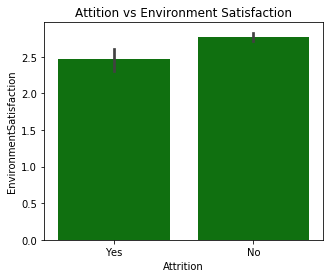

In [19]:
#Barplot - Attrition vs EnvironmentSatisfaction
plt.figure(figsize=(5,4))
sns.barplot(data=df, x='Attrition',y='EnvironmentSatisfaction',color='green')
plt.title("Attition vs Environment Satisfaction")

Text(0.5, 1.0, 'Attition vs Job Satisfaction')

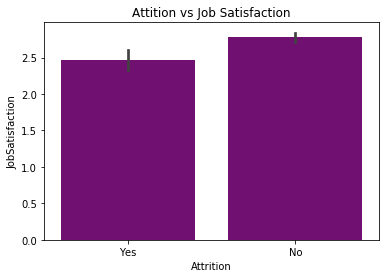

In [20]:
#Barplot - Attrition vs EnvironmentSatisfaction
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Attrition',y='JobSatisfaction',color='purple')
plt.title("Attition vs Job Satisfaction")

Text(0.5, 1.0, 'Education Field vs Monthly Income')

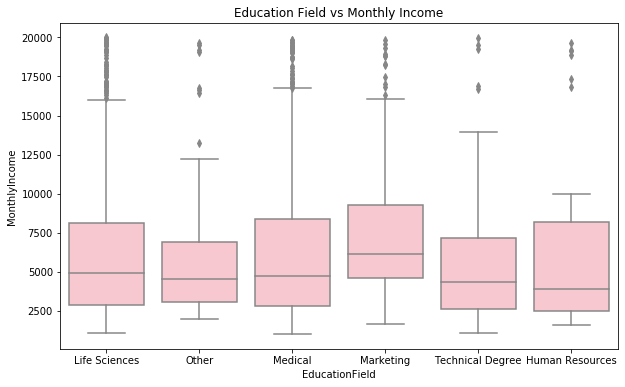

In [21]:
#Boxplot - Education Field vs Monthly Income
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='EducationField',y='MonthlyIncome',color='pink')
plt.title("Education Field vs Monthly Income")

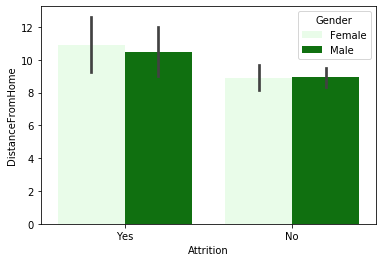

In [22]:
#Distance from home and Gender vs Attrition
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df,color='green')
plt.show()

<Figure size 432x288 with 0 Axes>

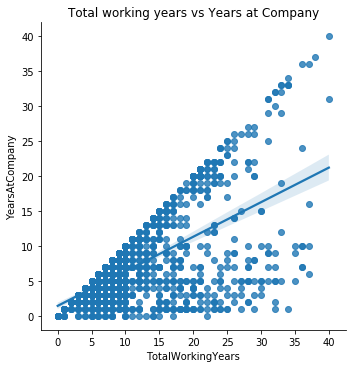

In [23]:
#lmplot - Total working years vs Years at Company
plt.figure()
sns.lmplot(data=df, x = 'TotalWorkingYears', y= 'YearsAtCompany')
plt.title("Total working years vs Years at Company")
plt.show()

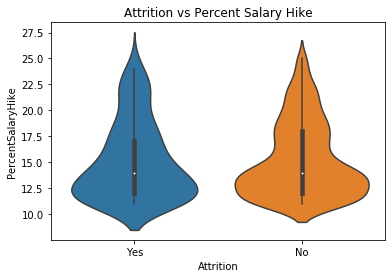

In [24]:
#Violinplot - Attrition vs Percent Salary Hike
sns.violinplot(x = 'Attrition',y = 'PercentSalaryHike',data = df)
plt.title("Attrition vs Percent Salary Hike")
plt.show()

Text(0.5, 1.0, 'Department vs Employee Number')

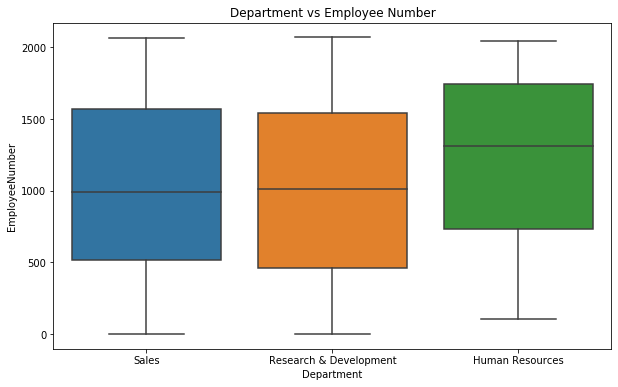

In [25]:
#Boxplot - Department vs Employee Number
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Department',y='EmployeeNumber')
plt.title("Department vs Employee Number")

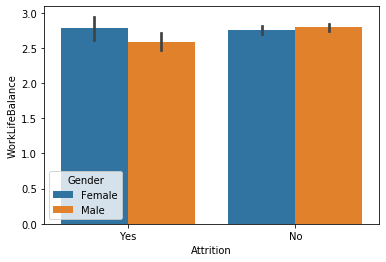

In [26]:
sns.barplot(x="Attrition", y = "WorkLifeBalance", hue = "Gender", data = df)

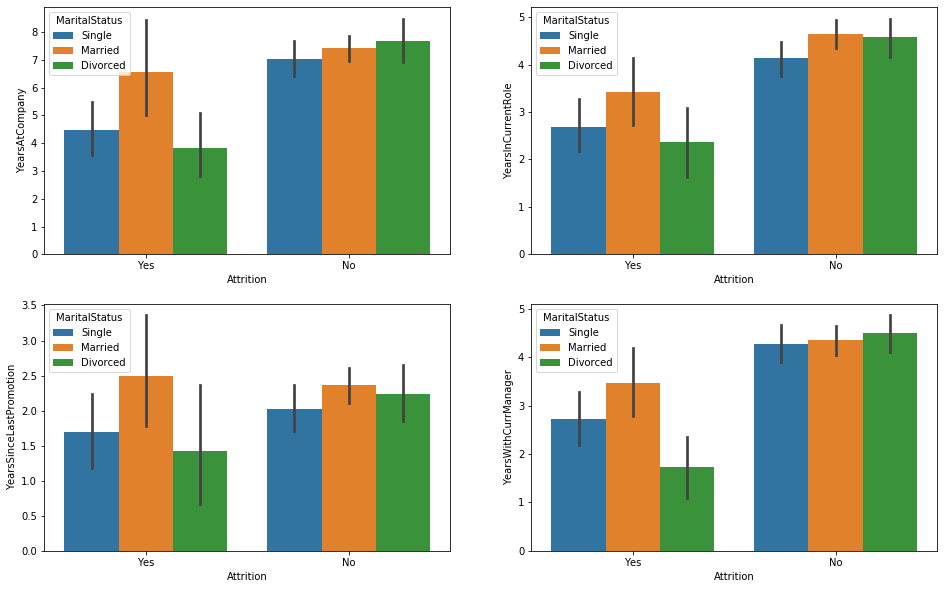

In [27]:
fig, axes = plt.subplots(2,2, figsize=(16, 10))
sns.barplot(x="Attrition", y = "YearsAtCompany", hue = "MaritalStatus", data = df,ax=axes[0,0])
sns.barplot(x="Attrition", y = "YearsInCurrentRole", hue = "MaritalStatus", data = df,ax=axes[0,1])
sns.barplot(x="Attrition", y = "YearsSinceLastPromotion", hue = "MaritalStatus", data = df,ax=axes[1,0])
sns.barplot(x="Attrition", y = "YearsWithCurrManager", hue = "MaritalStatus", data = df,ax=axes[1,1])

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

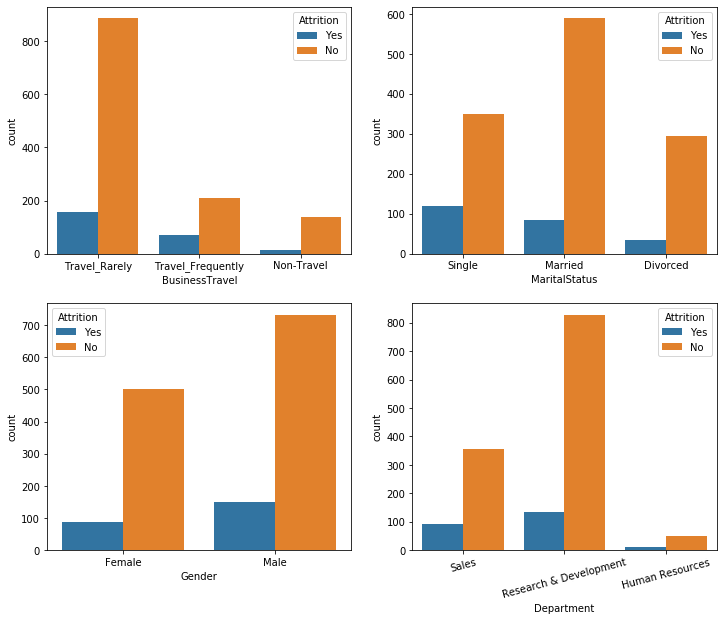

In [28]:
fig, ax4 = plt.subplots(2,2, figsize=(12,10))
sns.countplot(x="BusinessTravel", hue = "Attrition", data = df,ax = ax4[0,0])
sns.countplot(x='MaritalStatus',hue='Attrition',data=df,ax = ax4[0,1])
sns.countplot(x='Department',hue='Attrition',data=df,ax = ax4[1,1])
sns.countplot(x='Gender',hue='Attrition',data=df,ax = ax4[1,0])
xticks(rotation = 15)

##### People who travel rarely have more attrition rate.
##### Single and married have more attrition than divorced.
##### Male employees have found more attriction than female.
##### Employees from research and development have more attrition, Human resourses have found very less attriction.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

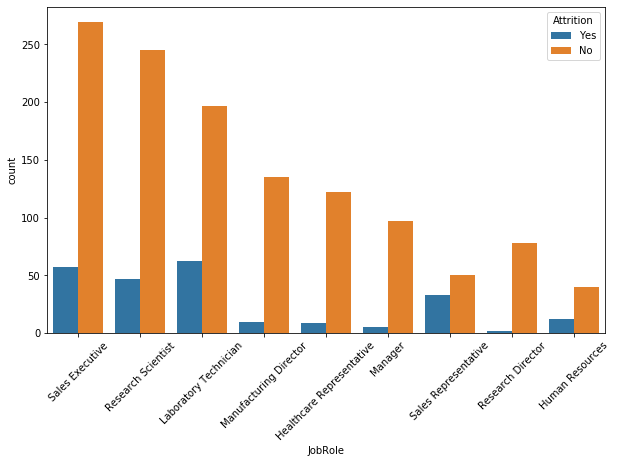

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(x="JobRole", hue = "Attrition", data = df)
xticks(rotation = 45)

##### Employees who are Sales Executives and Research Scientists have more attrition rate.

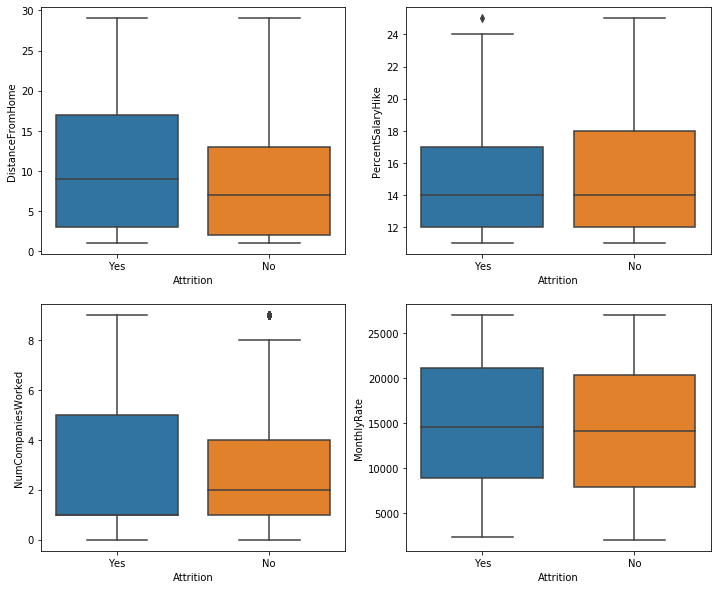

In [30]:
fig, ax4 = plt.subplots(2,2, figsize=(12,10))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, ax = ax4[0,0])
sns.boxplot(x='Attrition', y='PercentSalaryHike', data=df, ax = ax4[0,1])
sns.boxplot(x='Attrition', y='NumCompaniesWorked', data=df, ax = ax4[1,0])
sns.boxplot(x='Attrition', y='MonthlyRate', data=df, ax = ax4[1,1])

plt.show()

##### Attrition is not impacted much by percent salary hike.
##### Attrition seems lower for employees who have changed companies previously.

## 2.3 Correlation Matrix

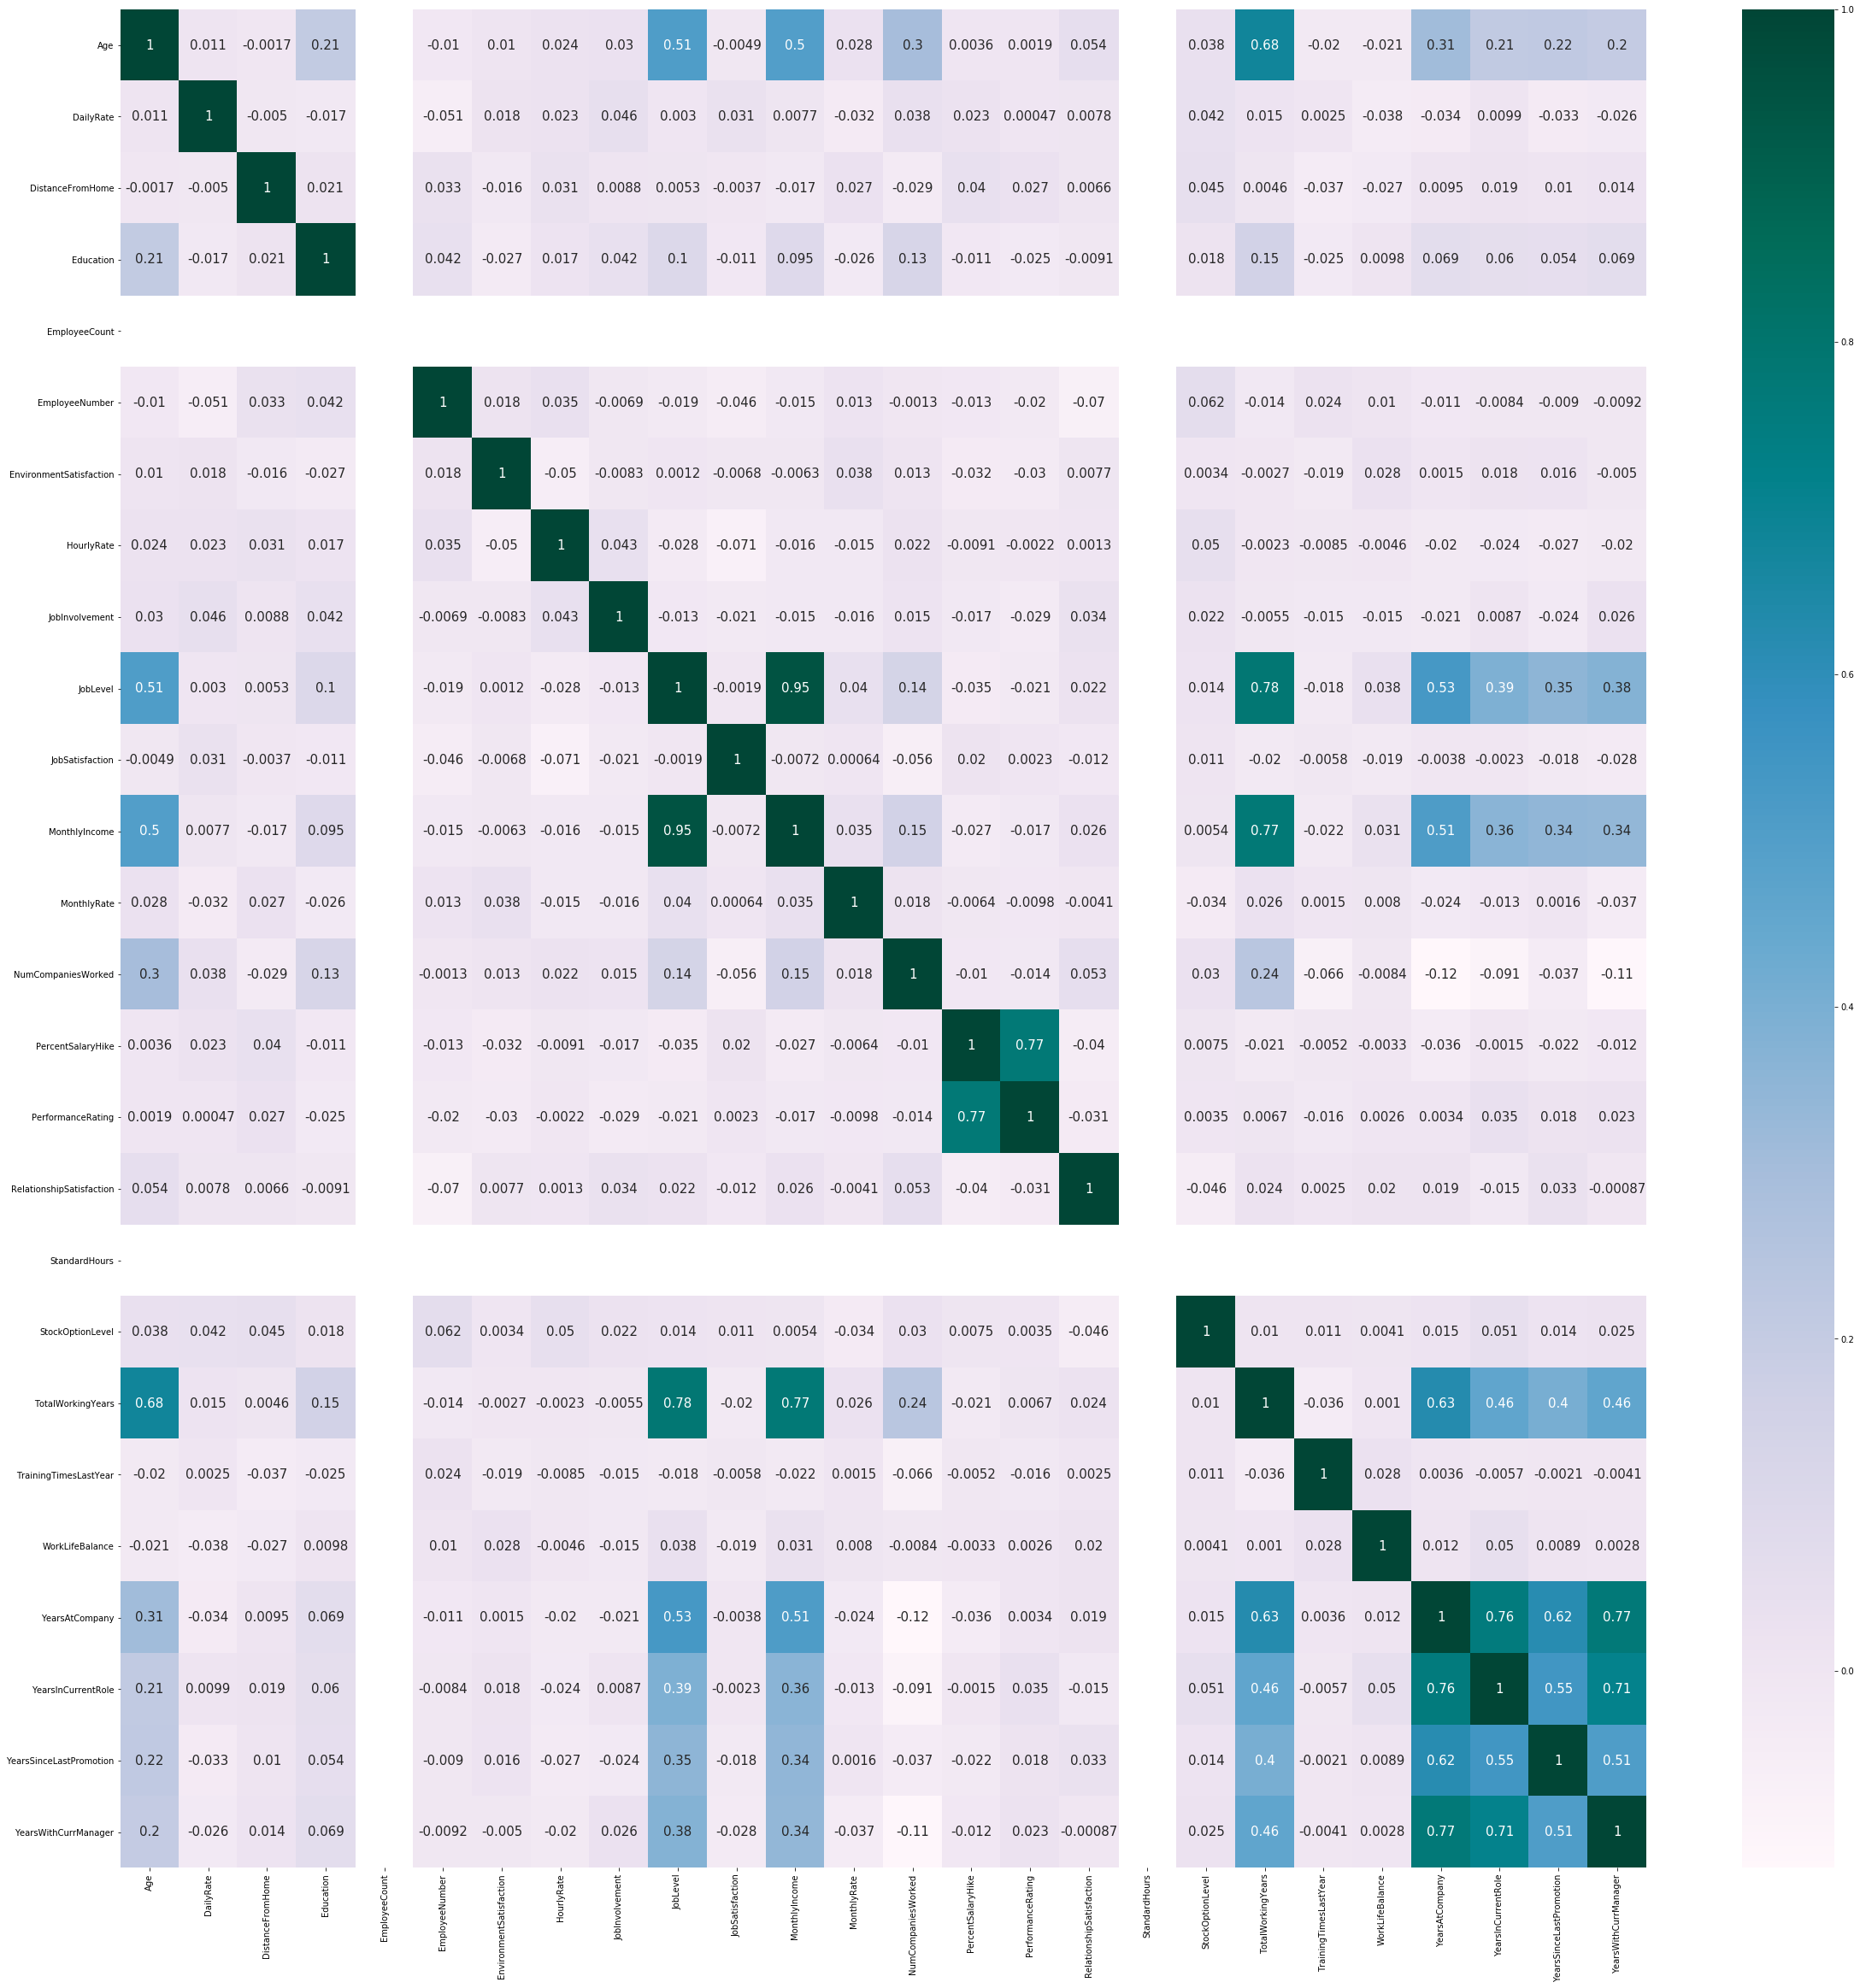

In [31]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(),annot = True,annot_kws={"size":15},cmap = 'PuBuGn')

#### Heatmap Inference:
   
##### Monthly Income and Job Level are highly correlated.
##### Job Level and Total Working Hours are highly correlated.
##### Monthly income is highly correlated with total working hours.
##### Percent Salary Hike and Performance Rating are highly correlated.
##### Years with current manager and years at company are highly correlated.

# 3. DATA WRANGLING

## 3.1 Drop Unnecessary/Unimportant Features

#### Employee Number, Employee count, Standard Hours and Over18 are not required for this analysis and modelling. By dropping these features, we can increase accuracy.

##### Reason - Standard Hours is constant (80 hrs) for all employees and all employees are over 18.

In [32]:
df.drop("EmployeeNumber", axis = 1, inplace = True)
df.drop("EmployeeCount", axis = 1, inplace = True)
df.drop("StandardHours", axis = 1, inplace = True)
df.drop("Over18", axis = 1, inplace = True)

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## 3.2 Encode Categorical Columns

In [34]:
#Import Libraries
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
#List categorical variables
cat_var = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [36]:
for i in cat_var:
    df[i]=le.fit_transform(df[i].astype(str))

In [37]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

## 3.3 One Hot Encoding

In [38]:
df =pd.get_dummies(df, columns=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus'])

In [39]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,0,1,0


# 4. Predictive Modelling using Machine Learning Algorithms

In [40]:
#To split the dataset
from sklearn.model_selection import train_test_split

In [41]:
Y = df.Attrition
df.drop(['Attrition'],axis=1,inplace=True)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(df, Y, test_size=0.33, random_state=42)

In [43]:
def model_report(y_true,y_pred):
    print("Accuracy = ",accuracy_score(y_true,y_pred))
    print("Recall = ",recall_score(y_true,y_pred))
    print("Precision = ",precision_score(y_true,y_pred))
    print("F1 Score = ",f1_score(y_true,y_pred))
    pass

### SMOTE - Over Sampling method

In [44]:
#Install SMOTE
! pip install imblearn --user

In [45]:
#Import necessary libraries
from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [46]:
oversampler = SMOTE(random_state=0)
smote_train, smote_target = oversampler.fit_sample(X_train, Y_train)

### Class Weights

It is necessary to balance the class weights as we are dealing with an imbalanced data set.

In [47]:
unique_classes = list(Y_train.unique())
unique_classes

[1, 0]

Weight of a class = No. of samples/ (No. of Classes * No. of samples for a particular class)

In [48]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = Y_train.shape[0]/((Y_train.loc[Y_train == classes].shape[0]) * len(unique_classes))

In [49]:
out_dict

{1: 2.946107784431138, 0: 0.602203182374541}

In [50]:
import warnings
warnings.filterwarnings("ignore")

## 4.1 Logistic Regression

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 4.1.1 Normal Dataset

In [52]:
#Fit the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [53]:
#TRAIN SCORE
Y_pred = logreg.predict(X_train)
acc_log = accuracy_score(Y_train,Y_pred)
print("Train Score = ",acc_log)

#RMSE
rmse = sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE = ",rmse)

Train Score =  0.8302845528455285
RMSE =  0.4119653470311205


In [54]:
#TEST SCORE
Y_pred = logreg.predict(X_test)
acc_log_test = accuracy_score(Y_test,Y_pred)
print("Test Score = ",acc_log_test)

#RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE = ",rmse)

Test Score =  0.8559670781893004
RMSE =  0.3795166950355407


### 4.1.2 Using SMOTE - Over Sampling Method

In [55]:
logreg.fit(smote_train, smote_target)
Y_pred = logreg.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy score: 0.6707818930041153
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       416
           1       0.23      0.54      0.32        70

    accuracy                           0.67       486
   macro avg       0.56      0.62      0.55       486
weighted avg       0.80      0.67      0.72       486



### 4.1.3 Class Weight - To tackle the imbalance

In [56]:
#Fit the model
logreg = LogisticRegression(class_weight = 'balanced').fit(X_train,Y_train)

In [57]:
class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)

array([0.60220318, 2.94610778])

In [58]:
Y_pred = logreg.predict(X_test)

In [59]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,78,18
1,55,8


Many samples are falsely classified as positive.

In [60]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.6049382716049383
Recall =  0.6285714285714286
Precision =  0.20952380952380953
F1 Score =  0.3142857142857143


#### Using GridSearch to obtain an optimal set of weights:

In [61]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.23947368421052628, 1: 0.7605263157894737}}


In [62]:
logreg = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [63]:
Y_pred = logreg.predict(X_test)

In [64]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,116,23
1,17,3


In [65]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.8065843621399177
Recall =  0.38571428571428573
Precision =  0.34615384615384615
F1 Score =  0.3648648648648648


## 4.2 K Nearest Neighbour

### 4.2.1 Normal Dataset

In [66]:
#Fit the model
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train) 

KNeighborsClassifier(n_neighbors=3)

In [67]:
Y_pred = knn.predict(X_train)  
acc_knn = accuracy_score(Y_train,Y_pred)
print("Train Score = ",acc_knn)

#RMSE
rmse = sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE = ",rmse)

Train Score =  0.8709349593495935
RMSE =  0.3592562325839407


In [68]:
Y_pred = knn.predict(X_test)  
acc_knn_test = accuracy_score(Y_test,Y_pred)
print("Test Score = ",acc_knn_test)

#RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE = ",rmse)

Test Score =  0.8106995884773662
RMSE =  0.4350866712766937


### 4.2.2 Using SMOTE - Over Sampling Method

In [69]:
knn.fit(smote_train, smote_target)
Y_pred = knn.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy score: 0.6378600823045267
              precision    recall  f1-score   support

           0       0.87      0.68      0.76       416
           1       0.18      0.41      0.25        70

    accuracy                           0.64       486
   macro avg       0.52      0.54      0.50       486
weighted avg       0.77      0.64      0.69       486



## 4.3 Gaussian Naive Bayes

### 4.3.1 Normal Dataset

In [70]:
#Fit the model
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  

GaussianNB()

In [71]:
Y_pred = gaussian.predict(X_train)  
acc_gaussian = accuracy_score(Y_train,Y_pred)
print("Train Score = ",acc_knn)

#RMSE
rmse = sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE = ",rmse)

Train Score =  0.8709349593495935
RMSE =  0.5


In [72]:
Y_pred = gaussian.predict(X_test)  
acc_gaussian_test = accuracy_score(Y_test,Y_pred)
print("Test Score = ",acc_knn_test)

#RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE = ",rmse)

Test Score =  0.8106995884773662
RMSE =  0.5211573066470477


### 4.3.2 Using SMOTE - Over Sampling Method

In [73]:
gaussian.fit(smote_train, smote_target)
Y_pred = gaussian.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy score: 0.6584362139917695
              precision    recall  f1-score   support

           0       0.90      0.67      0.77       416
           1       0.23      0.57      0.33        70

    accuracy                           0.66       486
   macro avg       0.57      0.62      0.55       486
weighted avg       0.81      0.66      0.71       486



## 4.4 Support Vector Machines

### 4.4.1 Normal Dataset

In [74]:
#Fit the model
svc = SVC()
svc.fit(X_train, Y_train)

SVC()

In [75]:
Y_pred = svc.predict(X_train)

acc_svc = accuracy_score(Y_train,Y_pred)
print("Train Score = ",acc_svc)

#RMSE
rmse = sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE = ",rmse)

Train Score =  0.8302845528455285
RMSE =  0.4119653470311205


In [76]:
Y_pred = svc.predict(X_test)
acc_svc_test = accuracy_score(Y_test,Y_pred)
print("Test Score = ",acc_svc_test)

#RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE = ",rmse)

Test Score =  0.8559670781893004
RMSE =  0.3795166950355407


### 4.4.2 Using SMOTE - Over Sampling Method

In [77]:
svc.fit(smote_train, smote_target)
Y_pred = svc.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy score: 0.5349794238683128
              precision    recall  f1-score   support

           0       0.89      0.52      0.66       416
           1       0.18      0.61      0.28        70

    accuracy                           0.53       486
   macro avg       0.53      0.57      0.47       486
weighted avg       0.79      0.53      0.60       486



### 4.4.3 Class weight - To tackle the imbalance

In [78]:
#Fit the model
svc = SVC(class_weight = 'balanced').fit(X_train,Y_train)

In [79]:
class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)

array([0.60220318, 2.94610778])

In [80]:
Y_pred = svc.predict(X_test)

In [81]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,54,14
1,79,12


In [82]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.5
Recall =  0.6857142857142857
Precision =  0.17843866171003717
F1 Score =  0.2831858407079646


#### Using GridSearch to obtain an optimal set of weights:

In [83]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=SVC(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.19210526315789472, 1: 0.8078947368421052}}


In [84]:
svc = SVC(**grid_result.best_params_).fit(X_train,Y_train)

In [85]:
Y_pred = svc.predict(X_test)

In [86]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,64,16
1,69,10


In [87]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.551440329218107
Recall =  0.5857142857142857
Precision =  0.1782608695652174
F1 Score =  0.2733333333333333


## 4.5 Decision Tree

### 4.5.1 Normal Dataset

In [88]:
#Fit the model
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  

DecisionTreeClassifier()

In [89]:
Y_pred = decision_tree.predict(X_train)  
acc_decision_tree = accuracy_score(Y_train,Y_pred)
print("Train Score = ",acc_decision_tree)

#RMSE
rmse = sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE = ",rmse)

Train Score =  1.0
RMSE =  0.0


In [90]:
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree_test = accuracy_score(Y_test,Y_pred)
print("Test Score = ",acc_decision_tree_test)

#RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE = ",rmse)

Test Score =  0.8127572016460906
RMSE =  0.4327156090943675


### 4.5.2 Using SMOTE - Over Sampling Method

In [91]:
decision_tree.fit(smote_train, smote_target)
Y_pred = decision_tree.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy score: 0.7592592592592593
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       416
           1       0.25      0.33      0.28        70

    accuracy                           0.76       486
   macro avg       0.56      0.58      0.57       486
weighted avg       0.79      0.76      0.77       486



### 4.5.3 Class Weight - To tackle the imbalance 

In [92]:
#Fit the model
decision_tree = DecisionTreeClassifier(class_weight = 'balanced').fit(X_train,Y_train)

In [93]:
class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)

array([0.60220318, 2.94610778])

In [94]:
Y_pred = decision_tree.predict(X_test)

In [95]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,112,21
1,21,5


In [96]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.8024691358024691
Recall =  0.32857142857142857
Precision =  0.3194444444444444
F1 Score =  0.323943661971831


#### Using GridSearch to obtain an optimal set of weights:

In [97]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.6657894736842105, 1: 0.3342105263157895}}


In [98]:
decision_tree = DecisionTreeClassifier(**grid_result.best_params_).fit(X_train,Y_train)

In [99]:
Y_pred = decision_tree.predict(X_test)  

In [100]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,115,23
1,18,3


In [101]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.7757201646090535
Recall =  0.34285714285714286
Precision =  0.27586206896551724
F1 Score =  0.3057324840764331


## 4.6 Random Forest

### 4.6.1 Normal Dataset

In [102]:
#Fit the model
random_forest = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, max_features=1, min_samples_split=25)

In [103]:
Y_pred = random_forest.predict(X_train)

acc_random_forest = accuracy_score(Y_train,Y_pred)
print("Train Score = ",acc_random_forest)

#RMSE
rmse = sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE = ",rmse)

Train Score =  0.8302845528455285
RMSE =  0.4119653470311205


In [104]:
Y_pred = random_forest.predict(X_test)
acc_random_forest_test = accuracy_score(Y_test,Y_pred)
print("Test Score = ",acc_random_forest_test)

#RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE = ",rmse)

Test Score =  0.8559670781893004
RMSE =  0.3795166950355407


### 4.6.2 Using SMOTE - Over Sampling Method

In [105]:
random_forest.fit(smote_train, smote_target)
Y_pred = random_forest.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy score: 0.8415637860082305
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       416
           1       0.43      0.31      0.36        70

    accuracy                           0.84       486
   macro avg       0.66      0.62      0.64       486
weighted avg       0.82      0.84      0.83       486



##### While using SMOTE to deal with the imbalanced data, we infer that Random Forest model is the best as per the classification report.

#### We will perform K-fold cross validation with 10 folds to output an array of 10 results.

In [106]:
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Train Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Train Scores: [0.82828283 0.82828283 0.82828283 0.82828283 0.82653061 0.82653061
 0.82653061 0.83673469 0.83673469 0.83673469]
Mean: 0.830292723149866
Standard Deviation: 0.004279206765968074


In [107]:
scores = cross_val_score(random_forest, X_test, Y_test, cv=10, scoring = "accuracy")
print("Test Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Test Scores: [0.85714286 0.85714286 0.85714286 0.85714286 0.85714286 0.85714286
 0.85416667 0.85416667 0.85416667 0.85416667]
Mean: 0.855952380952381
Standard Deviation: 0.0014580296087995056


### 4.6.3 Class Weight - To tackle the imbalance 

In [108]:
#Fit the model
random_forest = RandomForestClassifier(class_weight = 'balanced').fit(X_train,Y_train)

In [109]:
class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)

array([0.60220318, 2.94610778])

In [110]:
Y_pred = random_forest.predict(X_test)

In [111]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,130,25
1,3,1


In [112]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.8641975308641975
Recall =  0.1
Precision =  0.7
F1 Score =  0.175


#### Using GridSearch to obtain an optimal set of weights:

In [113]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.9026315789473683, 1: 0.09736842105263166}}


In [114]:
random_forest = RandomForestClassifier(**grid_result.best_params_).fit(X_train,Y_train)

In [115]:
Y_pred = random_forest.predict(X_test)

In [116]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,131,24
1,2,2


In [117]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.8744855967078189
Recall =  0.21428571428571427
Precision =  0.7142857142857143
F1 Score =  0.32967032967032966


## 4.7 XGBoost Classifier

In [118]:
import xgboost as xgb
from xgboost import XGBClassifier

### 4.7.1 Normal Dataset

In [119]:
#Fit the model
xgb = XGBClassifier(learning_rate = 0.05, n_estimators=100, max_depth=5)
xgb.fit(X_train,Y_train)

XGBClassifier(learning_rate=0.05, max_depth=5)

In [120]:
Y_pred = xgb.predict(X_train)
acc_xgb = accuracy_score(Y_train,Y_pred)
print("Train Score = ",acc_xgb)

#RMSE
rmse = sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE = ",rmse)

Train Score =  0.967479674796748
RMSE =  0.18033392693348646


In [121]:
Y_pred = xgb.predict(X_test)
acc_xgb = accuracy_score(Y_test,Y_pred)
print("Test Score = ",acc_xgb)

#RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE = ",rmse)

Test Score =  0.8683127572016461
RMSE =  0.36288736930121157


### 4.7.2 Using SMOTE - Over Sampling Method

In [122]:
xgb.fit(smote_train, smote_target)
Y_pred = xgb.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(Y_test, Y_pred)))
print(classification_report(Y_test, Y_pred))

Accuracy score: 0.8518518518518519
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       416
           1       0.47      0.23      0.31        70

    accuracy                           0.85       486
   macro avg       0.68      0.59      0.61       486
weighted avg       0.82      0.85      0.83       486



### 4.7.3 Class Weight - To tackle the imbalance 

In [123]:
#Fit the model
xgb = XGBClassifier(class_weight = 'balanced').fit(X_train,Y_train)

In [124]:
class_weight.compute_class_weight('balanced',np.unique(Y_train),Y_train)

array([0.60220318, 2.94610778])

In [125]:
Y_pred = xgb.predict(X_test)

In [126]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,127,23
1,6,3


In [127]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.8765432098765432
Recall =  0.24285714285714285
Precision =  0.7083333333333334
F1 Score =  0.36170212765957444


## 4.8 Hyperparameter Tuning

### 4.8.1 Random Forest

In [128]:
#Create param grid object 
forest_params = dict(     
    max_depth = [n for n in range(9, 14)],     
    min_samples_split = [n for n in range(4, 11)], 
    min_samples_leaf = [n for n in range(2, 5)],     
    n_estimators = [n for n in range(10, 60, 10)],
)

In [129]:
#Instantiate Random Forest model
forest = RandomForestClassifier()

In [130]:
#Build and fit model 
forest_cv = GridSearchCV(estimator=forest, param_grid=forest_params, cv=5) 
forest_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9, 10, 11, 12, 13],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [131]:
print("Best score: {}".format(forest_cv.best_score_))
print("Optimal params: {}".format(forest_cv.best_estimator_))

Best score: 0.8607893918988916
Optimal params: RandomForestClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=20)


In [132]:
Y_pred = forest_cv.predict(X_train)
acc_random_forest = accuracy_score(Y_train,Y_pred)
print("Train Score = ",acc_random_forest)

#RMSE
rmse = sqrt(mean_squared_error(Y_train, Y_pred))
print("RMSE = ",rmse)

Train Score =  0.9502032520325203
RMSE =  0.2231518495721684


In [133]:
Y_pred = forest_cv.predict(X_test)
acc_random_forest_test = accuracy_score(Y_test,Y_pred)
print("Test Score = ",acc_random_forest_test)

#RMSE
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE = ",rmse)

Test Score =  0.8662551440329218
RMSE =  0.3657114381135463


In [134]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.8662551440329218
Recall =  0.14285714285714285
Precision =  0.6666666666666666
F1 Score =  0.23529411764705882


## 4.9 Model Accuracy and Scores

### 4.9.1 Best Model

#### TRAIN SCORES:

In [135]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN','Naive Bayes','Support Vector Machines','Decision Tree','Random Forest','XGBoost'],
    'Score': [acc_log, acc_knn, acc_gaussian, acc_svc, acc_decision_tree, acc_random_forest,acc_xgb]})
df_result = results.sort_values(by='Score', ascending=False)
#Display
df_result

,Model,Score
4,Decision Tree,1.000000
5,Random Forest,0.950203
1,KNN,0.870935
6,XGBoost,0.868313
0,Logistic Regression,0.830285
3,Support Vector Machines,0.830285
2,Naive Bayes,0.750000


#### TEST SCORES:

In [136]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN','Naive Bayes','Support Vector Machines','Decision Tree','Random Forest','XGBoost'],
    'Score': [acc_log_test, acc_knn_test, acc_gaussian_test, acc_svc_test, acc_decision_tree_test, acc_random_forest_test,acc_xgb]})
df_result = results.sort_values(by='Score', ascending=False)
#Display
df_result

,Model,Score
6,XGBoost,0.868313
5,Random Forest,0.866255
0,Logistic Regression,0.855967
3,Support Vector Machines,0.855967
4,Decision Tree,0.812757
1,KNN,0.810700
2,Naive Bayes,0.728395


#### INFERENCE:

According to accuracy scores, XGBoost and RandomForest seem to be the best models. But for an imbalanced dataset, it is better to look at f1 scores.

## Final Model Prediction

We will now apply class weight to XGBoost model using SMOTE. 

In [137]:
#Fit the model
xgb = XGBClassifier(class_weight = 'balanced').fit(smote_train,smote_target)

In [138]:
class_weight.compute_class_weight('balanced',np.unique(smote_target),smote_target)

array([1., 1.])

In [139]:
Y_pred = xgb.predict(X_test)

In [140]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,120,24
1,13,2


In [141]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.8724279835390947
Recall =  0.38571428571428573
Precision =  0.5869565217391305
F1 Score =  0.46551724137931033


#### Using GridSearch to obtain an optimal set of weights:

In [142]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.05, 1: 0.95}}


In [143]:
random_forest = RandomForestClassifier(**grid_result.best_params_).fit(smote_train,smote_target)

In [144]:
Y_pred = random_forest.predict(X_test)

In [145]:
#CONFUSION MATRIX
pd.crosstab(pd.Series(Y_pred, name = 'Predicted'),
           pd.Series(Y_test, name = 'Actual'))

Actual,0,1
Predicted,,
0,128,26
1,5,0


In [146]:
#Generate the model report
print("MODEL REPORT:")
model_report(Y_test,Y_pred)

MODEL REPORT:
Accuracy =  0.8559670781893004
Recall =  0.14285714285714285
Precision =  0.5
F1 Score =  0.22222222222222224


## Conclusion:

#### XGBoost:
XGBoost seems to be the best model as it does not overfit and has handled the imbalanced data set well with the help of class_weight. When using SMOTE, the F1 score is 0.46. And after balancing the class weights, we obtained a precision of 0.7 and an accuracy of 0.87.